In [38]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import random
from skimage import morphology
import matplotlib.pyplot as plt


In [20]:
seed=42
random.seed = seed
np.random.seed(seed)
BATCH_SIZE = 1

In [25]:
data = np.load('data.npz')
X_train = data['X_train']
y_train = data['y_train']
    
data_gen_args = dict(rotation_range=90.,
                         width_shift_range=0.1,
                         height_shift_range=0.1,
                         zoom_range=0.2)
image_datagen_train = ImageDataGenerator(**data_gen_args)
mask_datagen_train = ImageDataGenerator(**data_gen_args)
image_datagen_train.fit(y_train, augment=True, seed=seed)
mask_datagen_train.fit(y_train, augment=True, seed=seed)
image_generator_train = image_datagen_train.flow(
    X_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=seed)
mask_generator_train = mask_datagen_train.flow(
    y_train,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=seed)

(256, 256, 1)


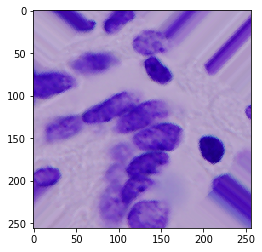

In [82]:
def combine_generator(gen1, gen2):
    while True:
        yield(gen1.next(), gen2.next())
train_generator = combine_generator(image_generator_train, mask_generator_train)

image, mask = next(train_generator)
maxValue = np.max(image)

image = np.squeeze(image, axis=0)
mask = np.squeeze(mask, axis=0)
# print(image.shape)
print(mask.shape)
contour = np.logical_xor(mask, morphology.binary_erosion(mask))
contour = np.repeat(contour, 3, 2)

# image[contour > 0] = maxValue
# plt.imshow(mask[:,:,0])
plt.imshow(image)

plt.show()

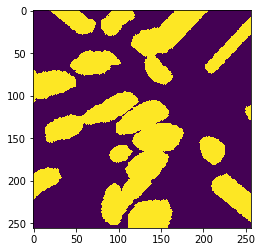

In [84]:
plt.imshow(mask[:,:,0])
plt.show()